In [ ]:
# 확률분포

# 동전을 한번 던져 나올 수 있는 경우의 확률 분포
# 앞 1/2 뒤 1/2

# 동전을 두번 던져 나올 수 있는 경우의 확률 분포
# (앞, 앞), (앞, 뒤), (뒤, 앞), (뒤, 뒤)
#    1/4       1/4       1/4       1/4
# 앞 = 1, 뒤 = 0으로 값을 정하면,
# 2 : 1/4, 1 : 1/2, 0 : 1/4

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def fact(n):
    ret = 1
    while n>1:
        ret *= n
        n -= 1
    return ret

def fact_r(n):
    if n==2:
        return n
    return fact_r(n-1)*n

def perm_f(n, r):
    return fact(n)/fact(n-r)

def combi_f(n, r):
    return fact(n)/(fact(n-r)*fact(r))

def count_with_replacement_order(pool, sel_count):  # all
    if sel_count == 1:
        return len(pool), [[x] for x in pool]
    a, b = count_with_replacement_order(pool, sel_count-1)
    r = []
    for x in pool:
        for b_i in b:
            r.append(b_i+[x])
    return len(r), r    

def perm_pool(pool, r):
    if r == 1:
        return len(pool), [[x] for x in pool]
    ret = []
    for x in pool:
        pool_copy = [y for y in pool]
        pool_copy.remove(x)
        a, b = perm_pool(pool_copy, r-1)
        for b_i in b:
            ret.append(b_i+[x])
    return len(ret), ret

def combi_pool(pool, r):
    a , b = perm_pool(pool, r)
    r = []
    for b_i in b:
        r.append(set(b_i))
    f = []
    for r_i in r:
        if r_i not in f:
            f.append(r_i)
    return len(f), f

def normal(x, mu=0, sigma=1):
    return (1/np.sqrt(2*np.pi)*sigma) * np.exp(-0.5*(((x-mu)/sigma)**2))

In [13]:
x = count_with_replacement_order([1, 0], 2)
print(x)
x_array = np.array(x[1])
print(x_array)
x_array1 = np.sum(x_array, axis = 1)
x_array2 = np.unique(x_array1, return_counts = True)
print(x_array2)
print(x_array2[1]/len(x_array1))

#_, axe = plt.subplots()
#axe.plot(x_array2[0], x_array2[1]/len(x_array1))

(4, [[1, 1], [0, 1], [1, 0], [0, 0]])
[[1 1]
 [0 1]
 [1 0]
 [0 0]]
(array([0, 1, 2]), array([1, 2, 1], dtype=int64))
[0.25 0.5  0.25]


In [20]:
# [주사위를 3번 던져 나온 숫자의 합]의 확률분포
tot, counts = count_with_replacement_order([x for x in range(1, 7)], 3)
# print(tot)
# print(counts)
counts_np = np.array(counts)
pass1 = np.sum(counts_np, axis = 1)
pass2 = np.unique(pass1, return_counts = True)
print(pass2)

#_, axe = plt.subplots()
#axe.plot(pass2[0], pass2[1] / tot)

(array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18]), array([ 1,  3,  6, 10, 15, 21, 25, 27, 27, 25, 21, 15, 10,  6,  3,  1],
      dtype=int64))


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([  1,  10,  45, 120, 210, 252, 210, 120,  45,  10,   1], dtype=int64))


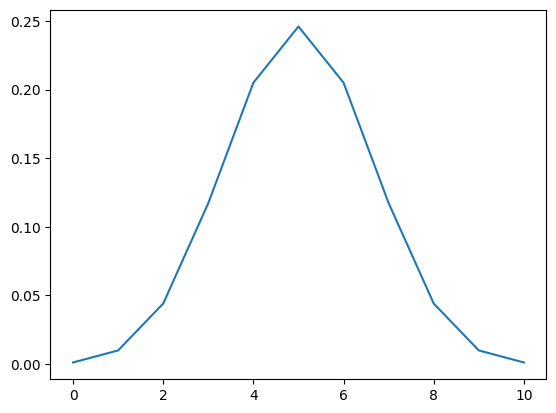

In [24]:
# 동전을 10번 던져(앞1, 뒤0) 나올 수 있는 합의 분포
tot, counts = count_with_replacement_order([1, 0], 10)
# print(tot)
# print(counts)
counts_np = np.array(counts)
pass1 = np.sum(counts_np, axis = 1)
pass2 = np.unique(pass1, return_counts = True)
print(pass2)

_, axe = plt.subplots()
axe.plot(pass2[0], pass2[1] / tot)

In [27]:
# 동전을 던져, 앞면이 나오면 100원을 주고,
# 뒷면이 나오면 100원을 받기로 함

# 앞면이 8번 나옴.
# 친구 : 동전이 조작되지 않음.    <- 귀무가설
# 나 : 아무래도 동전이 조작된 것 같다.    <- 대립가설

# print(pass2)
count2 = pass2[1]
print(count2)
print(np.sum(count2[-3:]) / tot)

# 만약 p-value가 합의한 유의수준 5%보다 클 경우,
# 발생 가능한 일반적인 케이스이므로,
# 귀무가설을 수용,
# 만약 p-value가 합의한 유의수준 5%보다 작을 경우,
# 희귀한 케이스에 속하므로
# 귀무가설을 기각, 대립가설을 채택.

[  1  10  45 120 210 252 210 120  45  10   1]
0.0546875


[1.62037037]
[0.90020576 0.45010288 0.19290123 0.06430041 0.01286008]


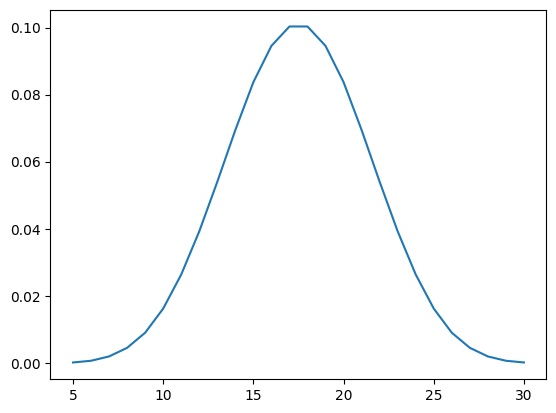

In [41]:
# 주사위를 5번 던졌을 때,
# 합이 25가 될 확률
# 합이 25보다 크면, 100원을 받기로 하였다. 합이 25보다 클 확률은? (25 미포함)

tot, counts = count_with_replacement_order([x for x in range(1, 7)], 5)
# print(tot)
# print(counts)
counts_np = np.array(counts)
# print(counts_np)
pass1 = np.sum(counts_np, axis = 1)
# print(pass1)
pass2 = np.unique(pass1, return_counts = True)
# print(pass2)
prob = pass2[1] / tot
v = pass2[0]

index_25 = v == 25
print(prob[index_25]*100)

index_25H = v > 25
print(prob[index_25H]*100)

_, axe = plt.subplots()
axe.plot(v, prob)

17.5 3.8188130791298667


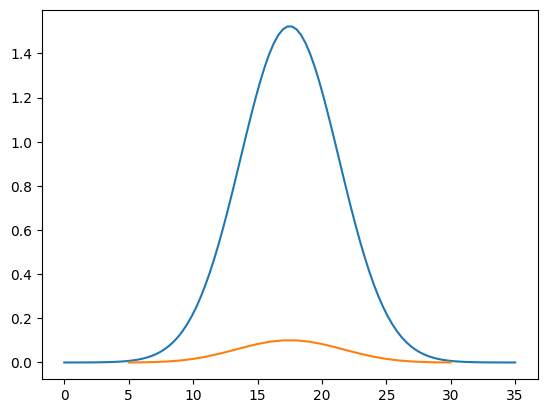

In [44]:
xs = np.linspace(0, 35, 100)
# xs = np.linspace(-5, 5, 100)
mu = np.mean(pass1)
sig = np.std(pass1)
print(mu, sig)

_, axe = plt.subplots()
axe.plot(xs, normal(xs, mu, sig))
axe.plot(v, prob)